# Sales Analysis

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

os.path.join(folder_path, "*.csv") combines folder_path with "*.csv". This means it will look for all files with a .csv extension in that folder.

glob.glob() searches the specified directory and returns a list of matching file paths.

In [2]:
folder_path='D:\\Sales_Data'

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dfs = [pd.read_csv(file) for file in csv_files]

combined_df = pd.concat(dfs, ignore_index=True)

In [3]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
combined_df.shape

(186850, 6)

# Data Cleaning

In [5]:
combined_df.isnull().sum() #Finding how many NAN values are there...

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df2=combined_df[combined_df.isna().any(axis=1)] #Finding the row having NAN

In [7]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
combined_df=combined_df.dropna() #Removing NAN values as those are not required  for our porcessing

# Q1. what was the best month for sales ? How much was earned that month)?

In [9]:
combined_df=combined_df[combined_df['Order Date'].str[0:2]!='Or'] # fixing another issue

In [10]:
combined_df['month']=combined_df['Order Date'].str[0:2]

In [11]:
combined_df['month']=combined_df['month'].astype('int32')

In [12]:
combined_df['Quantity Ordered']=pd.to_numeric(combined_df['Quantity Ordered']) 
combined_df['Price Each']=pd.to_numeric(combined_df['Price Each']) 

In [13]:
combined_df['sales']=combined_df['Quantity Ordered']*combined_df['Price Each']

In [14]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [15]:
combined_df[['month','Quantity Ordered','sales']].groupby('month').sum()

,Quantity Ordered,sales
month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


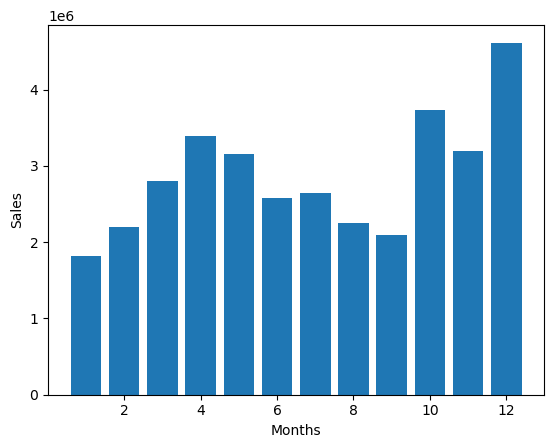

In [16]:
y=combined_df[['month','sales']].groupby('month').sum()
plt.xlabel('Months')
plt.ylabel('Sales')

plt.bar(y.index,y['sales'])
plt.show()



plt.show()


# Q2.Which city has the highest no of sales

In [17]:
combined_df['City']=combined_df['Purchase Address'].apply(lambda x : x.split(',')[1].strip() + '(' + x.split(',')[2].split(' ')[1] +')')

In [18]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [19]:
combined_df.groupby('City').agg({'sales':['sum']})

,sales
,sum
City,
Atlanta(GA),2795498.58
Austin(TX),1819581.75
Boston(MA),3661642.01
Dallas(TX),2767975.40
Los Angeles(CA),5452570.80
New York City(NY),4664317.43
Portland(ME),449758.27
Portland(OR),1870732.34


In [20]:
z=combined_df[['City','sales']].groupby('City').sum()

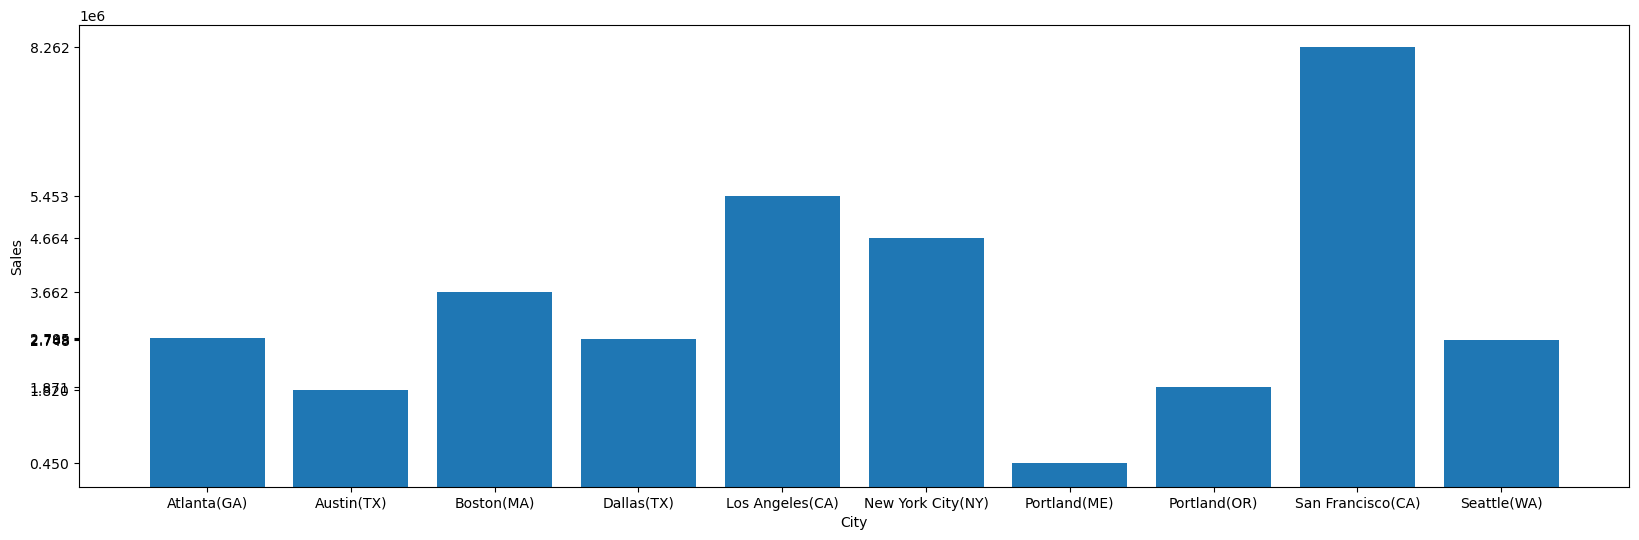

In [21]:
plt.figure(figsize=(20, 6))
plt.xlabel('City')
plt.ylabel('Sales')
plt.bar(z.index,z['sales'])
plt.yticks(z['sales'])

plt.show()

# Q3. What time should we display advertisements to maximise the likelihood of customers buying the product?"

In [22]:
combined_df['Order Date']=pd.to_datetime(combined_df['Order Date'])

C:\Users\jay\AppData\Local\Temp\ipykernel_5488\2895278396.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Order Date']=pd.to_datetime(combined_df['Order Date'])


In [23]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [24]:
combined_df['Hour']=combined_df['Order Date'].dt.hour

In [25]:
combined_df['Minutes']=combined_df['Order Date'].dt.minute

In [26]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


In [27]:
x=combined_df.groupby('Hour').count()

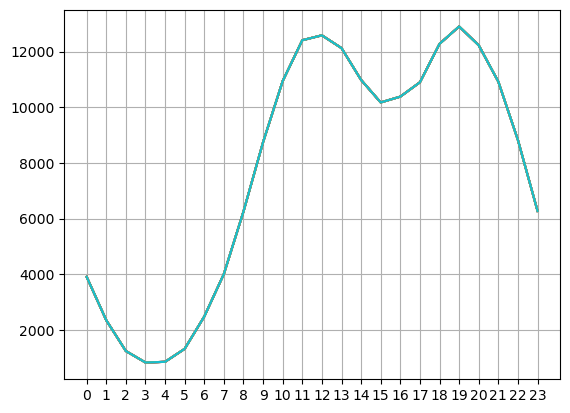

In [28]:
plt.xticks(x.index)
plt.grid()
plt.plot(x.index,combined_df.groupby('Hour').count())
plt.show()



plt.show()

# Q4. What products are more often sold together?

In [29]:
new_df=combined_df[combined_df['Order ID'].duplicated(keep=False)]

In [30]:
new_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour,Minutes
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38


In [31]:
new_df['Grouped']=new_df.groupby('Order ID')['Product'].transform(lambda x :','.join(x))

C:\Users\jay\AppData\Local\Temp\ipykernel_5488\3153841983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped']=new_df.groupby('Order ID')['Product'].transform(lambda x :','.join(x))


In [32]:
new_df=new_df[['Order ID','Grouped']].drop_duplicates()


In [33]:
new_df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [34]:
from itertools import combinations
from collections import Counter

In [35]:
count=Counter()

for row in new_df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

    
count.most_common((10))


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# Q5. What product sold the most? Why do you think it did? 

In [36]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


In [37]:
Product_group=combined_df.groupby('Product')

In [38]:
Product_group['Quantity Ordered'].count()

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity Ordered, dtype: int64